### Solve Ordinary Differential Equation - SciPy ODEINT

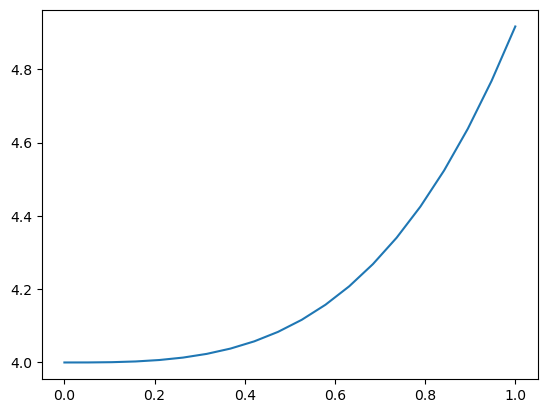

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# soln = odeint(function,x0,x,arg)

def my_eq(y,x):
    dydx = x**3 + (2*x**2)

    return dydx

y0 = 4 # value of y when x = 0
x = np.linspace(0,1,20)

y = odeint(my_eq,y0,x)

plt.plot(x,y)
plt.show()

### Response of Single Degree of Freedom

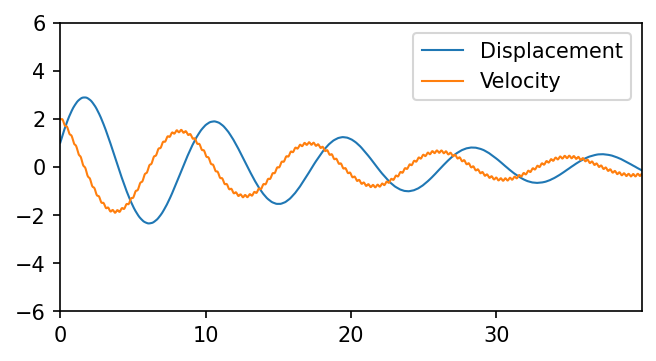

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin,cos,pi
from numpy.linalg import inv

# inputs
M = 100 # mass
C = 10 # damping
K = 50 # stiffness
w = 20 # omega
F0 = 100 # force amplitude

end_time = 40
time_step = 0.01
time = np.arange(0,end_time,time_step)

A = np.array([[M,0],
              [0,1]])
B = np.array([[C,K],
              [-1,0]])
x = np.array([[2],
              [1]])
F = np.zeros([2,1])

# empty arrays
S = [] # displacement
V = [] # velocity
T = [] # time

for t in time:
    F[0] = F0*sin(w*t)
    X = x + (time_step*(inv(A)).dot(F-B.dot(x)))
    x = X
    S.append(X[1])
    V.append(X[0])
    T.append(t)

plt.figure(figsize=(5,2.5),dpi=150)
plt.plot(T,S,label='Displacement',lw=1)
plt.plot(T,V,label='Velocity',lw=1)

plt.yticks(np.arange(-6,8,2))
plt.xticks(np.arange(0,end_time,10))

plt.legend()
plt.xlim(0,end_time)
plt.show()

### Vibrations of Single Degree of Freedom Systems

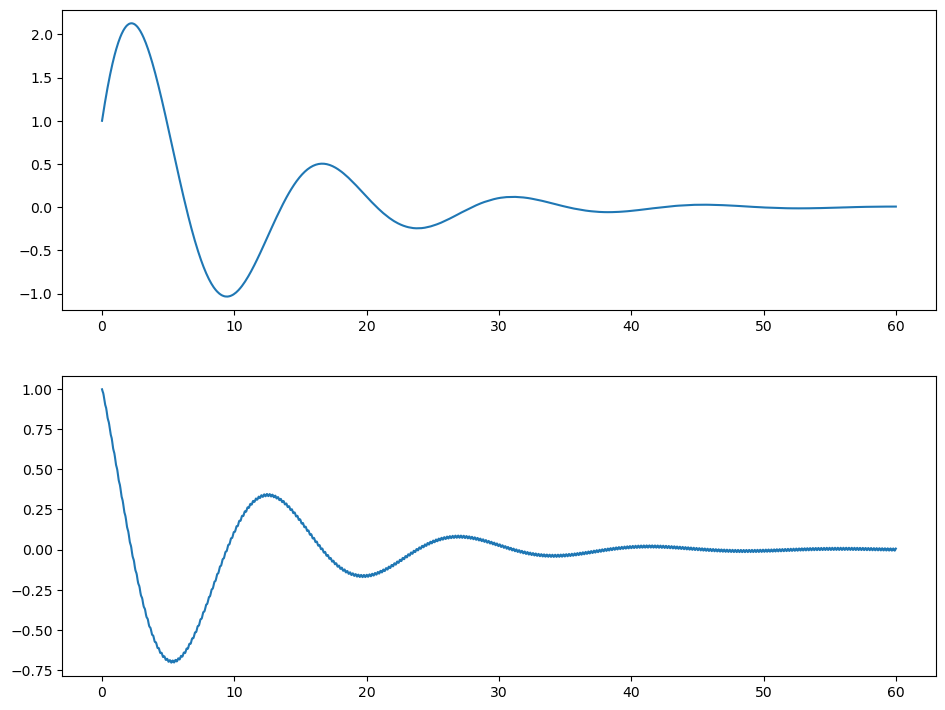

In [1]:
# # Single DOF Problem - Scipy ODEINT

# In[20]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def SDOF(state,t):
    M = 500  # Mass
    K = 100 # stiffness
    C = 100  # damping 
    
    F0 = 100
    w = 30
    
    x,xd = state
    
    xdd = F0*np.sin(w*t)/M - (C/M)*xd - (K/M)*x
    
    return [xd,xdd]

initial_cond = [1,1]
ti = 0
tf = 60
time_step = 0.01

time = np.arange(ti,tf,time_step)

state1 = odeint(SDOF,initial_cond,time)
disp = state1[:,0]
vel = state1[:,1]

plt.figure(figsize=(10,7.5))
plt.subplot(211)
plt.plot(time,disp)
plt.tight_layout(pad=3)

plt.subplot(212)
plt.plot(time,vel)

plt.show()


### frequency Response of Spring Mass System

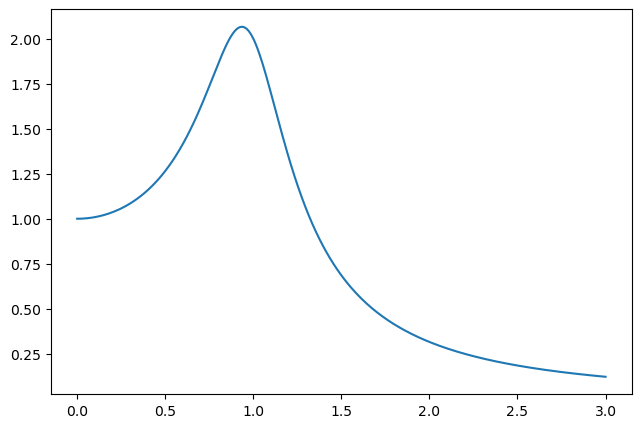

In [2]:
import numpy as np
import matplotlib.pyplot as plt

r = np.linspace(0,3,300) # frequency ratio
zeta = 0.25

a = 1-r**2
b = (2*zeta*r)

fr = 1/np.sqrt(a**2+b**2)

plt.figure(figsize=(7.5,5))
plt.plot(r,fr)
plt.show()

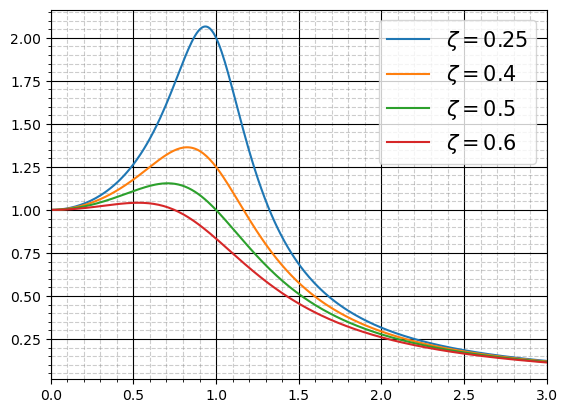

In [9]:
import numpy as np
import matplotlib.pyplot as plt

r = np.linspace(0,3,300) # frequency ratio
zeta = [0.25,0.4,0.5,0.6]

for z in zeta:
    a = 1-r**2
    b = 2*z*r
    fr = 1/np.sqrt(a**2+b**2)
    plt.plot(r,fr,label=r'$\zeta={}$'.format(z))

plt.legend(loc='best', fontsize = 15)
plt.grid(which='major',color='black')
plt.minorticks_on()
plt.grid(which='minor', color='grey', linestyle='--', alpha=0.4)
plt.xlim(r[0],r[-1])
plt.show()

### Natural Frequencies

In [3]:
import numpy as np
from scipy import linalg

m1,m2,m3 = 2.5,5,7.5
k1,k2,k3 = 120,130,100

M = np.array([[m1,0,0],
              [0,m2,0],
              [0,0,m3]])
K = np.array([[k1+k2,-k2,0],
              [-k2,k2+k3,-k3],
              [0,-k3,k3]])
# Eigen values

u,v = linalg.eigh(K,M)

# print(u) # Eigen Value
# print(v) # Eigen Vector

Wn = np.sqrt(u)
print("First Natural Frequency:",Wn[0])
print("Second Natural Frequency:",Wn[1])
print("Third Natural Frequency:",Wn[2])

First Natural Frequency: 1.960226313458667
Second Natural Frequency: 6.028854369670311
Third Natural Frequency: 10.91529940600187


### Frequency Response of Multi Degree Freedom System

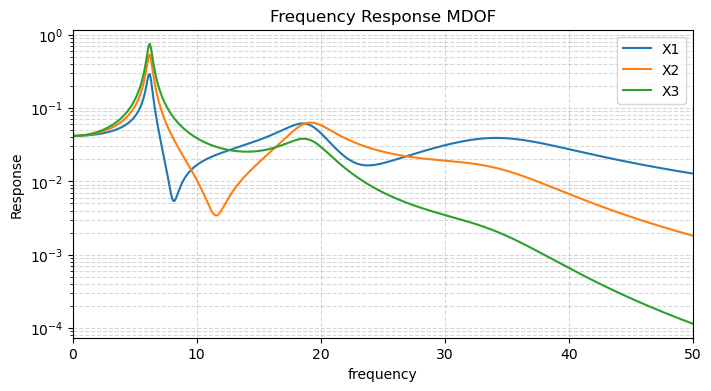

In [14]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import cmath

m1,m2,m3 = 2.5,5,7.5
k1,k2,k3 = 1200,1300,1000

w = np.linspace(0,50,500)
alpha = 0.01
beta = 0.01

real = 0
img = 1
i = complex(real,img)

W = []
X1 = []
X2 = []
X3 = []

for f in w:
    M = np.array([[m1,0,0],
              [0,m2,0],
              [0,0,m3]])
    
    K = np.array([[k1+k2,-k2,0],
              [-k2,k2+k3,-k3],
              [0,-k3,k3]])

    C = (alpha*M) + (beta*K)

    Force = np.array([[50],
                      [0],
                      [0]])

    D = K - (f**2*M) - (i*f*C)
    x = linalg.inv(D).dot(Force)
    X1.append(abs(x[0]))
    X2.append(abs(x[1]))
    X3.append(abs(x[2]))
    W.append(f)

plt.figure(figsize=(8,4))
plt.plot(W,X1,label='X1')
plt.plot(W,X2,label='X2')
plt.plot(W,X3,label='X3')

plt.xlim(W[0],W[-1])
plt.yscale('log')
plt.grid(which='both',linestyle='--',alpha=0.5)
plt.legend()
plt.title('Frequency Response MDOF')
plt.xlabel("frequency")
plt.ylabel("Response")
plt.show()
    


### Quarter Car Suspension Model

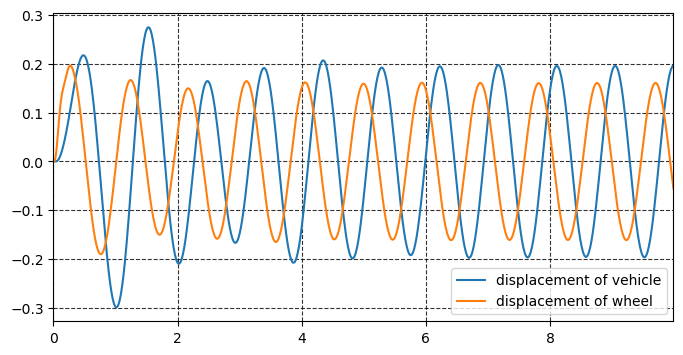

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin,cos,pi

# input
m1 = 400
m2 = 30

k1 = 10e3
k2 = 40e3

c1 = 1000
c2 = 0

a = 0.2 # road bump amplitude
v = 0.85 # velocity of vehicle
d = 0.8 # bump width

w = 2*pi*(v/d) # frequency of the nump

ts = 0
t_step = 0.01
T = np.arange(0,10,t_step)

A = np.array([[0,1,0,0],
              [-k1/m1,-c1/m1,k1/m1,c1/m1],
              [0,0,0,1],
              [k1/m2,c1/m2,-(k1+k2)/m2,-(c1+c2)/m2]])

F = np.array([0,0,0,0])
x = np.array([0,0,0,0])

d1 = []
v1 = []
d2 = []
v2 = []

for t in T: 
    F[3] = (k2/m2)*a*sin(w*t)
    x = x + t_step*(A.dot(x) + F)
    d1.append(x[0])
    v1.append(x[1])
    d2.append(x[2])
    v2.append(x[3])

plt.figure(figsize=(8,4),dpi=100)
plt.plot(T,d1,label='displacement of vehicle')
plt.plot(T,d2,label='displacement of wheel')
plt.grid(linestyle='--', color='k',alpha=0.8)
plt.legend(loc='best')
plt.xlim(T[0],T[-1])
plt.show()

### Single Speed Break Profile

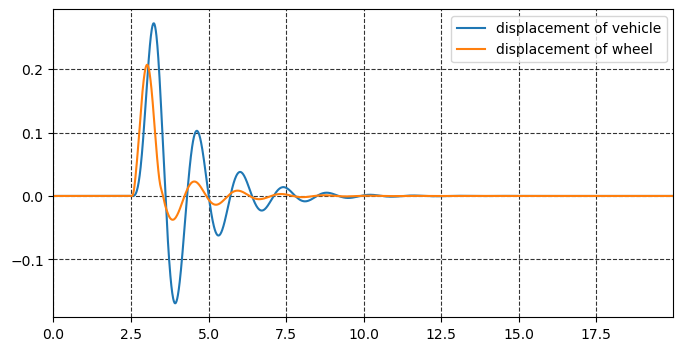

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin,cos,pi

# input
m1 = 400
m2 = 30

k1 = 10e3
k2 = 40e3

c1 = 1000
c2 = 0

a = 0.2 # road bump amplitude
v = 0.85 # velocity of vehicle
d = 0.8 # bump width

w = 2*pi*(v/d) # frequency of the nump

ts = 2.5
t_step = 0.01
T = np.arange(0,20,t_step)

A = np.array([[0,1,0,0],
              [-k1/m1,-c1/m1,k1/m1,c1/m1],
              [0,0,0,1],
              [k1/m2,c1/m2,-(k1+k2)/m2,-(c1+c2)/m2]])

F = np.array([0,0,0,0])
x = np.array([0,0,0,0])

d1 = []
v1 = []
d2 = []
v2 = []

for t in T: 
    if ts < t < (ts+d/v):
        F[3] = 0.5*(k2/m2)*a*(1-cos(w*(t-ts)))
    else:
        F[3] = 0
        
    x = x + t_step*(A.dot(x) + F)
    d1.append(x[0])
    v1.append(x[1])
    d2.append(x[2])
    v2.append(x[3])

plt.figure(figsize=(8,4),dpi=100)
plt.plot(T,d1,label='displacement of vehicle')
plt.plot(T,d2,label='displacement of wheel')
plt.grid(linestyle='--', color='k',alpha=0.8)
plt.legend(loc='best')
plt.xlim(T[0],T[-1])
plt.show()

### Assignment Number 2

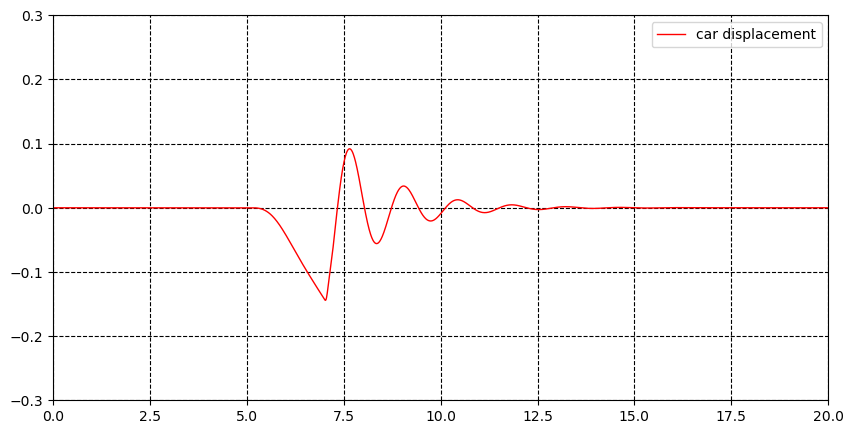

max displacement of the vehicle is: -0.14424086361541805


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin,cos,pi
from matplotlib.widgets import Slider, Button, RadioButtons


# variables

m1 = 400
m2 = 30

k1 = 10000
k2 = 40000
c1 = 1000
c2 = 0
a = -0.2            
v  = 0.85
d = 0.8
w = 2*pi*(v/d)

F0 = k2*a/m2

t_step = 0.01
T = np.arange(0,20+t_step,t_step)

A = np.array([[0.0,1.0,0.0,0.0],
              [-k1/m1,-c1/m1,k1/m1,c1/m1],
              [0.0,0.0,0.0,1.0],
              [k1/m2,c1/m2,-(k1+k2)/m2,-(c1+c2)/m2]])


F_k = np.array([0.0,0.0,0.0,0.0])
y = np.array([0.0,0.0,0.0,0.0])
force = []
y1 = []
y2 = []
y3 = []
y4 = []

ts = 5
for t in T:
    if 0<t<=ts:
        F_k[3] = 0
    elif ts<t<(ts+2):
        F[3] = 0.5*F0*(1-np.cos(1*(t-ts)))
        #F[3] = 0.5*F0*sin(t)
    else:
        F[3] = 0
        
    y = y + t_step * (A.dot(y) + F)
    y1.append(y[0])
    y2.append(y[1])
    y3.append(y[2])
    y4.append(y[3])
    
    force.append(F[3])
plt.figure(figsize=(10,5))
#plt.plot(T,force)
plt.plot(T,y1,label='car displacement',linewidth=1,color='red')
#plt.plot(T,y3,label='wheel displacement')
plt.grid(linestyle='--',color='black')
plt.legend()
plt.xlim(T[0],T[-1])
plt.ylim(-0.3,0.3)
plt.show()

high_d = np.max(y1)
low_d = np.min(y1)
if high_d > abs(low_d):
    print("max displacement of the vehicle is:",high_d)
else:
    print("max displacement of the vehicle is:",low_d)
